<a href="https://colab.research.google.com/github/YusraFathima/Intern/blob/main/CricketMatchScoreAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Player Statistics with Batting Average, Bowling Strike Rate, Economy Rate, and Points:
      Match                  Player    Runs  Wickets  Batting Average  \
0        75         V Kohli (INDIA)  2633.0     20.0      3761.428571   
1       104       RG Sharma (INDIA)  2633.0     14.0      2742.708333   
2        83         MJ Guptill (NZ)  2436.0      7.0      3045.000000   
3       111  Shoaib Malik (ICC/PAK)  2263.0     30.0      2175.961538   
4        71        BB McCullum (NZ)  2140.0     10.0      3057.142857   
...     ...                     ...     ...      ...              ...   
2001      3   SG Whittingham (SCOT)     NaN      NaN              NaN   
2002      3        LJ Woodcock (NZ)     NaN      NaN              NaN   
2003      1        Zamir Khan (AFG)     NaN      NaN              NaN   
2004      1          S Zargar (Mex)     NaN      NaN              NaN   
2005      1      Ziaur Rahman (AFG)     NaN      NaN              NaN   

      Bowling Strike Rate  Economy R

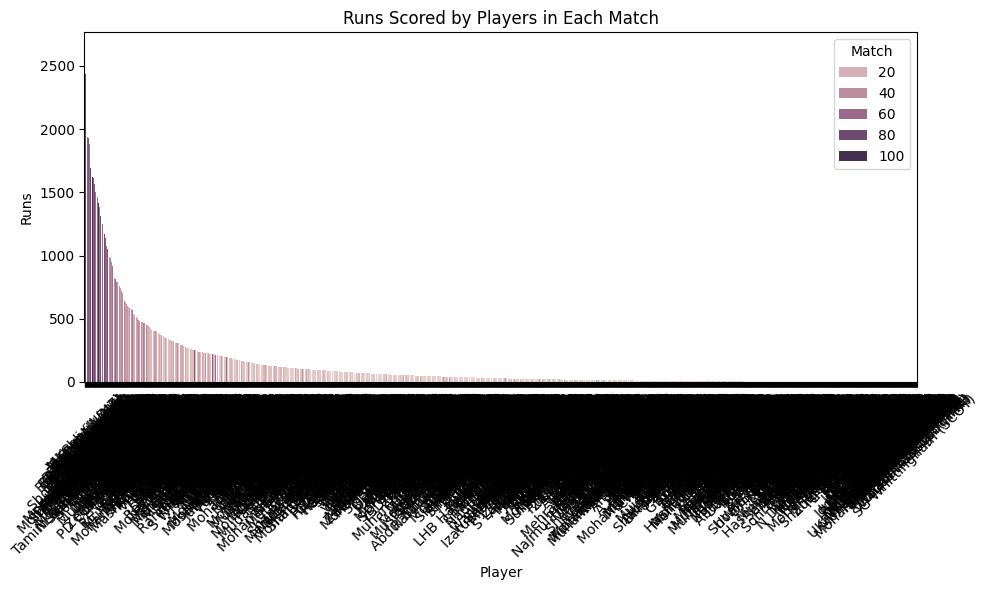

<ipython-input-1-48d9ab503277>:122: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


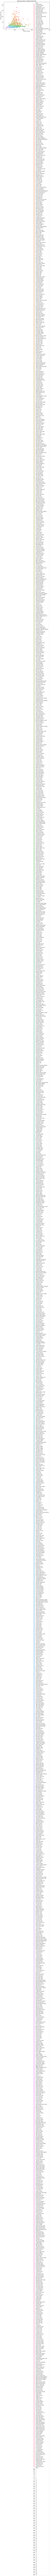

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For demonstration, using an example dataset
file_path = "cricket_match_data.csv"  # Replace with your actual CSV file path
data = pd.read_csv(file_path)

# Create DataFrame from sample data
df = pd.DataFrame(data)

# Convert relevant columns to numeric types to avoid errors during calculations
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')
df['Wickets'] = pd.to_numeric(df['Wickets'], errors='coerce')
df['Balls Faced'] = pd.to_numeric(df['Balls Faced'], errors='coerce')
df['Balls Bowled'] = pd.to_numeric(df['Balls Bowled'], errors='coerce')
df['Fours'] = pd.to_numeric(df['Fours'], errors='coerce')
df['Sixes'] = pd.to_numeric(df['Sixes'], errors='coerce')
df['Maiden Overs'] = pd.to_numeric(df['Maiden Overs'], errors='coerce')

# 1. Function to calculate total team runs per match
def team_total_runs(df):
    return df.groupby('Match')['Runs'].sum()

# 2. Function to calculate batting average (Runs / Balls Faced * 100)
def batting_average(df):
    df['Batting Average'] = (df['Runs'] / df['Balls Faced']) * 100
    return df

# 3. Function to calculate bowling strike rate (Balls Bowled / Wickets)
def bowling_strike_rate(df):
    df['Bowling Strike Rate'] = df['Balls Bowled'] / df['Wickets'].replace(0, 1)  # Avoid division by zero
    return df

# 4. Function to calculate economy rate (Runs Given / Balls Bowled * 6)
def economy_rate(df):
    df['Economy Rate'] = (df['Runs'] / df['Balls Bowled']) * 6
    return df

# 5. Function to calculate total points for each player
# Points system: Runs + (10 * Wickets) + (2 * Sixes) + Fours
def points_system(df):
    df['Points'] = df['Runs'] + (df['Wickets'] * 10) + (df['Sixes'] * 2) + (df['Fours'] * 1)
    return df

# 6. Function to calculate Net Run Rate (NRR)
# NRR is calculated as the average runs per over scored - the average runs per over conceded
def calculate_nrr(df):
    # Runs per over scored and conceded
    df['Runs Per Over'] = df['Runs'] / (df['Balls Faced'] / 6)
    df['Runs Conceded Per Over'] = df['Runs'] / (df['Balls Bowled'] / 6)

    # Calculating NRR for each match
    nrr = df.groupby('Match').agg({'Runs Per Over': 'mean', 'Runs Conceded Per Over': 'mean'})
    nrr['NRR'] = nrr['Runs Per Over'] - nrr['Runs Conceded Per Over']
    return nrr

# 7. Function to identify top run scorer and wicket taker in each match
def top_run_scorer(df):
    return df.loc[df['Runs'].idxmax()]

def top_wicket_taker(df):
    return df.loc[df['Wickets'].idxmax()]

# Apply functions to the DataFrame
df = batting_average(df)
df = bowling_strike_rate(df)
df = economy_rate(df)
df = points_system(df)

# Calculate NRR
nrr = calculate_nrr(df)

# Display Results
print("Player Statistics with Batting Average, Bowling Strike Rate, Economy Rate, and Points:")
print(df[['Match', 'Player', 'Runs', 'Wickets', 'Batting Average', 'Bowling Strike Rate', 'Economy Rate', 'Points']])

# Team Total Runs per Match
team_runs = team_total_runs(df)
print("\nTeam Total Runs per Match:")
print(team_runs)

# Top Performers
run_scorer = top_run_scorer(df)
wicket_taker = top_wicket_taker(df)
print(f"\nTop Run Scorer: {run_scorer['Player']} with {run_scorer['Runs']} runs")
print(f"Top Wicket Taker: {wicket_taker['Player']} with {wicket_taker['Wickets']} wickets")

# Net Run Rate (NRR) per Match
print("\nNet Run Rate (NRR) per Match:")
print(nrr[['NRR']])

# Visualizations: Bar chart for runs and scatter plot for Batting Average vs. Bowling Strike Rate

# Bar plot for runs scored by players
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Player', y='Runs', hue='Match')
plt.title('Runs Scored by Players in Each Match')
plt.ylabel('Runs')
plt.xlabel('Player')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot for Batting Average vs Bowling Strike Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Batting Average', y='Bowling Strike Rate', hue='Player', style='Match', s=100)
plt.title('Batting Average vs Bowling Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Bowling Strike Rate')
plt.tight_layout()
plt.show()

